In [63]:
import numpy as np
from matplotlib import pyplot as plt

#Class for creating a Perceptron
class Perceptron:

    #initialize perceptron
    def __init__(self, neurons, epochs, x_train_data, x_test_data, y_train_data, y_test_data, eta, num_training, num_testing):
        self.neurons = neurons #number of input neurons
        self.bias = 1 #bias
        self.epochs = epochs #number of epochs
        self.eta = eta #learning rate
        self.ee = np.zeros(num_training) #error difference between predicted value and generated value
        self.mse = np.zeros(self.epochs) #mean squared error for plotting the graph
        self.weight = np.zeros(neurons) #initial weight
        self.num_training = num_training #number of training samples
        self.num_testing = num_testing #number of testing samples
        self.error_points = 0 #to keep track of the total testing error
        
        self.x_train_data = x_train_data
        self.x_test_data = x_test_data
        
        self.y_train_data = y_train_data
        self.y_test_data = y_test_data

    #return the output of activation function
    def activation_func(self, x):
        y = np.transpose(self.weight).dot(x) + self.bias
        
        # sigmoid function
        y = 1/(1 + np.exp(-y))

        if y == 1:
            return 1
        elif y < 1:
            return 0
        else:
            return 2



    def fit(self): #learn through the number of traing samples

        for e in range(self.epochs):

            for i in range(self.num_training):
                #fetch data
                x = self.x_train_data[i, 0:self.neurons]

                #fetch desired output from dataset
                d = self.y_train_data[i]

                #activation function
                y = self.activation_func(x)

                #calculate difference
                self.ee[i] = d - y

                #new weight
                new_weight = self.weight + x.dot(self.ee[i] * self.eta)

                #at any point if the weights are similar, then skip to the next epoch
                if new_weight[i] == self.weight[i]: 
                    break
                
                #otherwise set the new weight as current weight
                self.weight = new_weight

            #calculate mean squared error for each epoch
            self.mse[e] = np.square(self.ee).mean()

        training_accuracy = 100 - ((self.ee[self.num_training - 1]/self.num_training) * 100)
        print(f'Total samples trained: {self.num_training}')
        print(f'Training accuracy: {training_accuracy}%')
        print(f'Total epochs: {self.epochs}')


    #show graph of learning curve against mean squared error
    def plot_fit(self):
        plt.xlabel('Epochs')
        plt.ylabel('Mean squared error (mse)')
        plt.title('Training accuracy')
        plt.plot(self.mse)
        plt.show()


    def predict(self): #predict and calulate testing accuracy
        
        for i in range(self.num_testing):
            #fetch data
            x = self.x_test_data[i, 0:self.neurons]

            # activation function
            y = self.activation_func(x)

            #calculate error points
            if y!=self.y_test_data[i]:
                self.error_points += 1

        #calculate testing accuracy
        testing_accuracy = 100 - ((self.error_points/self.num_testing) * 100)

        print(f'Total samples tested: {self.num_testing}')
        print(f'Total errror points: {self.error_points}')
        print(f'Testing accuracy: {testing_accuracy:.2f}%')
        

Total samples trained: 100
Training accuracy: 100.0%
Total epochs: 200


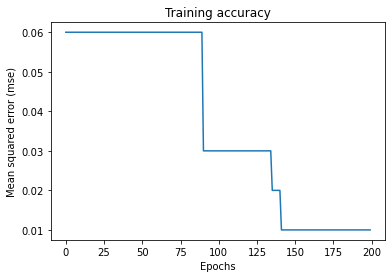

Total samples tested: 50
Total errror points: 20
Testing accuracy: 60.00%


In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

if __name__ == '__main__':
    
    # load the iris data
    X,y = load_iris(return_X_y=True)
    
    # separate train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    num_training = X_train.shape[0] # number of training data
    num_testing = X_test.shape[0]  # number of testing data
    epochs = 200 # number of epochs to iterate

    #-----------------initialize Perceptron variables---------------------
    neurons = X_train.shape[1] # number of input neurons
    eta = 0.001 #learning rate


    # ------------------initialize Perceptron network----------------------
    perceptron = Perceptron(neurons, epochs, X_train, X_test, y_train, y_test, eta, num_training, num_testing)

    #Train the perceptron
    perceptron.fit()

    #Plot training data
    perceptron.plot_fit()

    #Test the perceptron
    perceptron.predict()